## Import Functions

In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### 🎯 Loss function : Mean Squared Error (MSE)
The loss function used in this linear regression model is the **Mean Squared Error (MSE)**. It measures the average squared difference between the true values $ y_i $ and the predicted values $ \hat{y}_i = m*x_i + b 
$.

The formula is:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (m*x_i + b) \right)^2
$$


In [68]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x=points.iloc[i].Study_time
        y=points.iloc[i].Mark
        total_error+=(y - (m * x + b )) ** 2
    return total_error / float(len(points))
        
    
    

### Gradient Descent for Linear Regression

The function below performs one iteration of **gradient descent** to update the parameters \( m \) (slope) and \( b \) (intercept) of a simple linear regression model.

The gradients are computed as partial derivatives of the Mean Squared Error loss function with respect to \( m \) and \( b \):

$$
\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^n x_i*\left(y_i - (m *x_i + b)\right)
\quad \text{and} \quad
\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (m *x_i + b)\right)
$$

The parameters are updated by moving **against** the gradient, scaled by the learning rate \( L \):

$$
m \leftarrow m - L \times \frac{\partial}{\partial m}, \quad b \leftarrow b - L \times \frac{\partial}{\partial b}
$$




In [69]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].Study_time
        y = points.iloc[i].Mark


        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))



    m = m_now - m_gradient * L 
    b = b_now - b_gradient * L



    return m, b
                                    


        

## Import Data

In [70]:
import pandas as pd
import numpy as np


np.random.seed(0)
study_time = 2 * np.random.rand(100)
marks = 4 + 3 * study_time + np.random.randn(100)


data = pd.DataFrame({
    "Study_time": study_time,
    "Mark": marks
})


## Implementation

In [71]:
m = 0
b = 0
L = 0.01  
epochs = 1000


for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss_function(m, b, points)}")
print(f"Our final m and b parameters are :\n m = {m}\n b = {b}")

Epoch 0, Loss: 49.112085551140375
Epoch 100, Loss: 1.1212213193530065
Epoch 200, Loss: 1.0545788902028976
Epoch 300, Loss: 1.0250451417202162
Epoch 400, Loss: 1.0095486843654458
Epoch 500, Loss: 1.001417023799399
Epoch 600, Loss: 0.9971499901079001
Epoch 700, Loss: 0.9949108931391144
Epoch 800, Loss: 0.9937359422017431
Epoch 900, Loss: 0.9931193946718798
Our final m and b parameters are :
 m = 2.99983630495613
 b = 4.186799174312735


## Visualisation of our results

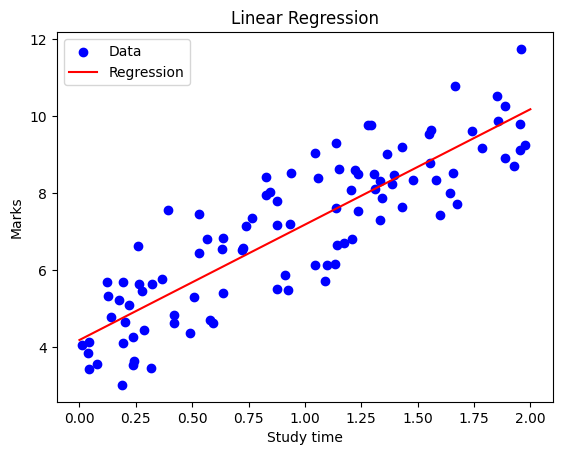

In [72]:
plt.scatter(points.Study_time, points.Mark, color='blue', label='Data')
x_vals = np.linspace(0, 2, 100)
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='red', label='Regression')
plt.xlabel("Study time")
plt.ylabel("Marks")
plt.legend()
plt.title("Linear Regression")
plt.show()


## 📌 Comparison: Custom Gradient Descent vs scikit-learn LinearRegression 

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression


X = data[['Study_time']].values
y = data['Mark'].values

model = LinearRegression()
model.fit(X, y)


m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

mse_sklearn = loss_function(m_sklearn, b_sklearn, data)
print(f"Loss using scikit-learn model: {mse_sklearn}")


mse_custom = loss_function(m, b, data)
print(f"Loss using custom model): {mse_custom}")


Loss using scikit-learn model: 0.9924386487246479
Loss using custom model): 0.992798176482419


## 📌 Comparison Between Custom Gradient Descent and Sklearn’s SGDRegressor

In [75]:
from sklearn.linear_model import SGDRegressor

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', penalty=None, random_state=42)
sgd.fit(X_scaled, y)


m_sgd = sgd.coef_[0] / scaler.scale_[0]
b_sgd = sgd.intercept_[0] - (scaler.mean_[0] * sgd.coef_[0]) / scaler.scale_[0]

sgd_loss = loss_function(m_sgd, b_sgd, data)

print("Gradient Descent: m =", m, ", b =", b, ", Loss =", custom_loss)
print("sklearn SGDRegressor: m =", m_sgd, ", b =", b_sgd, ", Loss =", sgd_loss)


Gradient Descent: m = 2.99983630495613 , b = 4.186799174312735 , Loss = 0.992798176482419
sklearn SGDRegressor: m = 3.014601545490956 , b = 4.161009222774899 , Loss = 0.9934531467770289
